<a href="https://colab.research.google.com/github/Aaaron1995/ml_class2022/blob/main/class1025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression 流程

> 根據不同參數計算出來**非固定答案**，稱做「Regression」。

目標：產生一個有 *不同範圍* 的判斷模型\
流程：
1. 載入資料
2. 轉換為矩陣型態(array)以便切割、運算
3. 將模型的題目與答案丟入決策樹演算法(DecisionTreeRegressor)當中
4. 可視化決策樹
5. 判斷模型精準度
---

# 載入資料

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [93]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from sklearn.datasets import load_boston #載入範例模型
import pandas as pd

boston = load_boston()
db = pd.DataFrame(boston["data"], columns = boston["feature_names"]) #讀取資料為表格
db["ans"] = boston["target"]
db

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 將資料轉為矩陣

- 資料處理Data.Frame &rarr; pandas
- sklearn: array &rarr; numpy

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split

# drop為panda中的語法，可以對欄位進行切割
x = db.drop("ans", axis=1)
# DataFrame的資料轉化為array，利用train_test_split做矩陣切割
x = np.array(x)
y = np.array(db["ans"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(pd.DataFrame(x_train, columns = boston["feature_names"]),"\n")
print(pd.DataFrame(x_test, columns = boston["feature_names"]))

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0    14.23620   0.0  18.10   0.0  0.693  6.343  100.0  1.5741  24.0  666.0   
1     0.09299   0.0  25.65   0.0  0.581  5.961   92.9  2.0869   2.0  188.0   
2     1.51902   0.0  19.58   1.0  0.605  8.375   93.9  2.1620   5.0  403.0   
3     0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
4     0.05660   0.0   3.41   0.0  0.489  7.007   86.3  3.4217   2.0  270.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
450   0.07022   0.0   4.05   0.0  0.510  6.020   47.2  3.5549   5.0  296.0   
451   0.05561  70.0   2.24   0.0  0.400  7.041   10.0  7.8278   5.0  358.0   
452   0.09849   0.0  25.65   0.0  0.581  5.879   95.8  2.0063   2.0  188.0   
453   5.82115   0.0  18.10   0.0  0.713  6.513   89.9  2.8016  24.0  666.0   
454  13.91340   0.0  18.10   0.0  0.713  6.208   95.0  2.2222  24.0  666.0   

     PTRATIO       B  LSTAT  
0       20.2  396.90  20.32  
1  

In [ ]:
#分割出訓練資料與驗證資料，分割比例為9:1 or 8:2
from sklearn.model_selection import train_test_split

train_test_split(
    [1, 2, 3, 4],
    [5, 6, 7, 8,],
    [9, 10, 11, 12],
    test_size = 0.25
)

In [ ]:
#留意axis切欄=1切列=0
import pandas as pd
A = pd.DataFrame(
    [[1, 2],
    [3, 4]],
    columns = ["a", "b"],
    index = ["a", "b"]
)
B = A.drop("a",axis = 0)
C = A.drop("a",axis = 1)

print(A,"\n")
print(B,"\n")
print(C)

# 建構模型
>使用sklearn.tree中的[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [144]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=7)#調整最大深度
reg.fit(x_train, y_train)#將訓練資料丟進DecisionTreeRegressor裡

DecisionTreeRegressor(max_depth=7)

#可視化模型
>使用sklearn.tree中的[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

[Text(0.5, 0.875, 'RM <= 6.92\nsquared_error = 86.732\nsamples = 455\nvalue = 22.746'),
 Text(0.25, 0.625, 'LSTAT <= 14.78\nsquared_error = 40.064\nsamples = 384\nvalue = 20.019'),
 Text(0.125, 0.375, 'DIS <= 1.385\nsquared_error = 27.067\nsamples = 239\nvalue = 23.153'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CRIM <= 5.769\nsquared_error = 18.62\nsamples = 145\nvalue = 14.854'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RM <= 7.437\nsquared_error = 81.357\nsamples = 71\nvalue = 37.496'),
 Text(0.625, 0.375, 'CRIM <= 7.393\nsquared_error = 43.754\nsamples = 42\nvalue = 32.24'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'CRIM <= 2.742\nsquared_error = 37.888\nsamples = 29\nvalue = 45.107'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

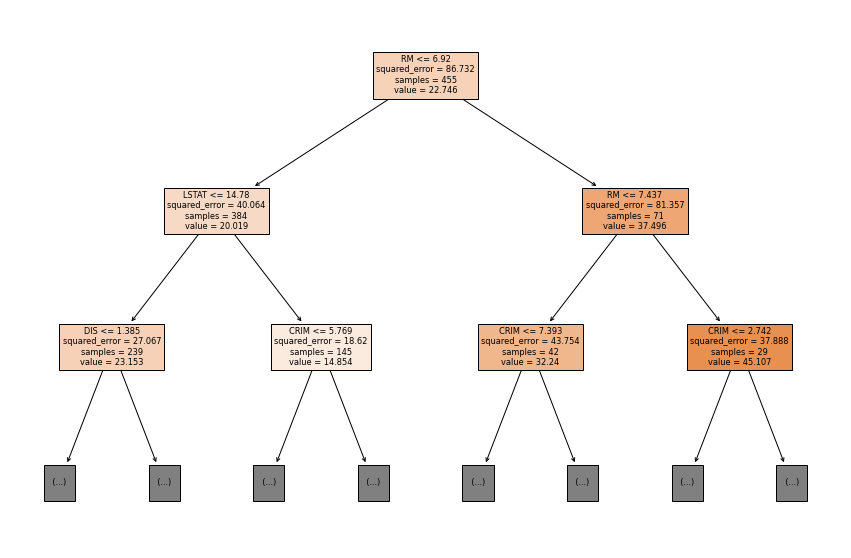

In [145]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 10))#設定圖框大小，置入決策圖
plot_tree(
    reg, 
    feature_names = boston["feature_names"], #將項目名稱放回框框中
    filled = True, #填入顏色
    max_depth = 2 #印出層數
)

RM：住宅的平均房间数

LSTAT：低收入人群比例

square_error：方差

samples：樣本數

value：平均

---

通過不同的分支將*均方誤差*降至**最低** 

$MSE = \frac{1}{n}\displaystyle\sum^{n}_{i=1}{(p_i-\overline{p})^2}\\
RMSE = \sqrt{MSE}\\
MAE = \frac{1}{n}\displaystyle\sum^{n}_{i=1}{|p_i-\overline{p}|}$
---




#避免完美訓練 

當未設置最大深度時，演算法會直接運算至底層(MSE = 0)。\
So 回歸分析一定要進行深度設置不然決策樹會將所有答案描繪出來形成過擬合。

#測試模型精準度

In [146]:
x_t = reg.predict(x_test) #x_text經過回歸模型reg之後預測出來的值(是矩陣型態)
y_t = y_test
MSE_a = 0
for i in range(0,x_t.size):
  MSE_a += ((x_t[i]-y_t[i])**2)/x_t.size #MSE(pre,true)
  
mu = 0
for i in range(0,y_t.size):
  mu += y_t[i]
mu = mu/y_t.size #ARV(true)

MSE_b = 0
for i in range(0,y_t.size):
  MSE_b += ((mu-y_t[i])**2)/y_t.size #MAE(ARV(true),true)

MSE = MSE_a/MSE_b

print(f"預測值(x_test)與真實值(y_test)的均方誤差：{MSE_a}", f"真實值平均與真實值(y_test)的均方誤差：{MSE_b}", sep = "\n")
print(f"標準化均方誤差：{MSE}", f"模型準確率：{(1-MSE)*100:.2f}%", sep = "\n")

預測值(x_test)與真實值(y_test)的均方誤差：12.629235906820313
真實值平均與真實值(y_test)的均方誤差：59.76286043829296
標準化均方誤差：0.21132248045356525
模型準確率：78.87%


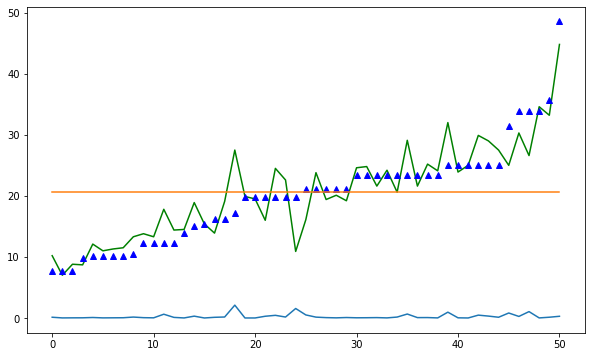

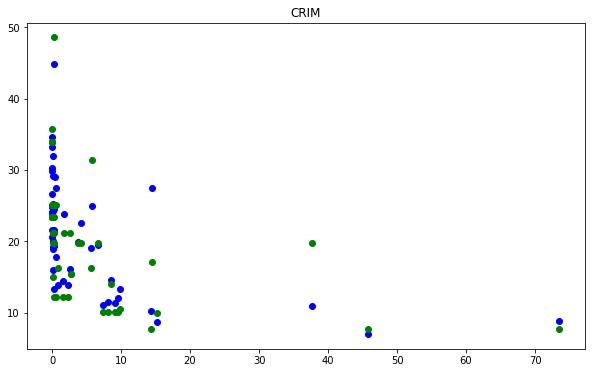

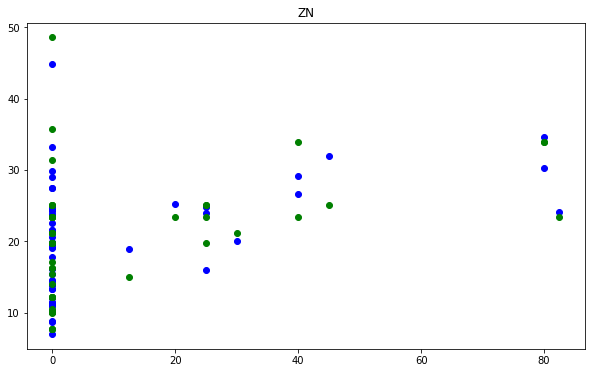

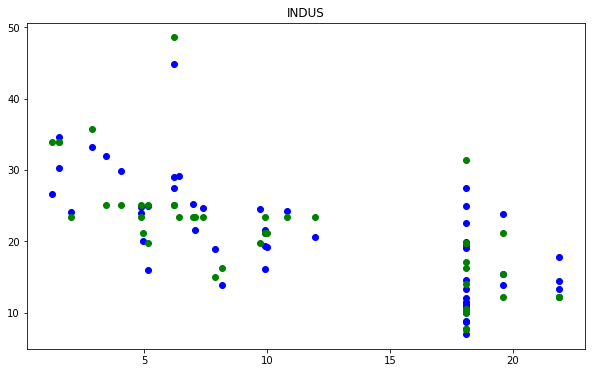

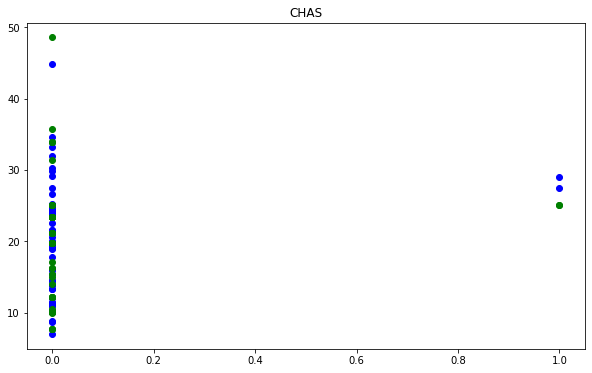

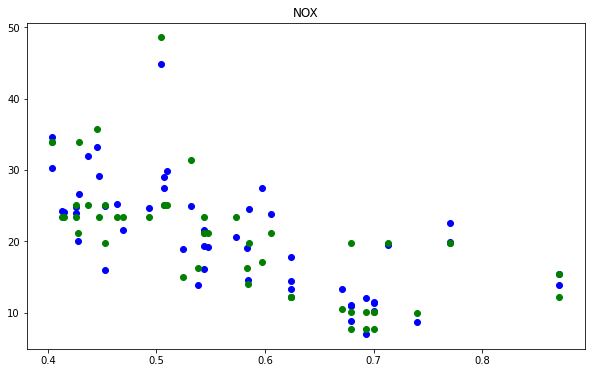

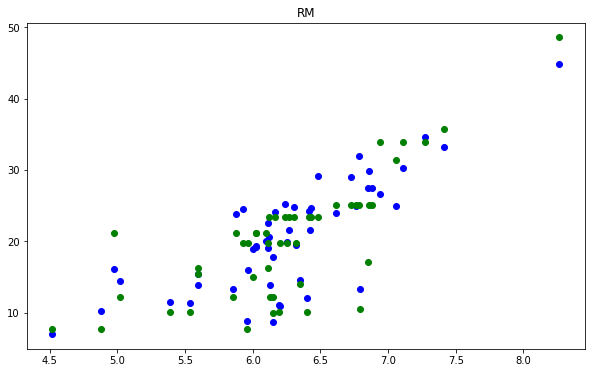

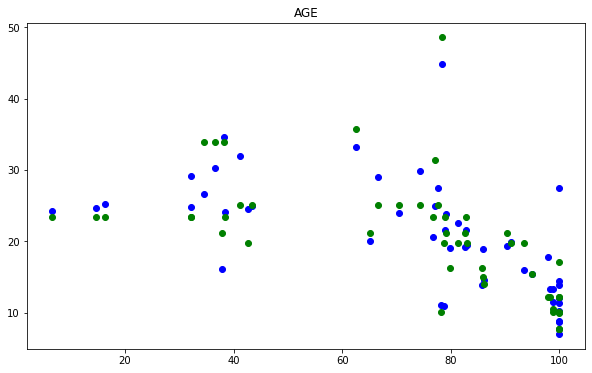

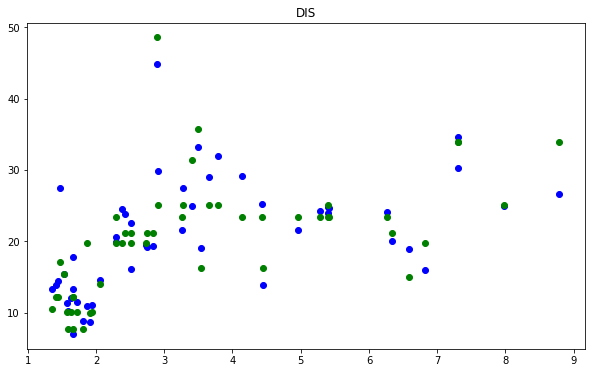

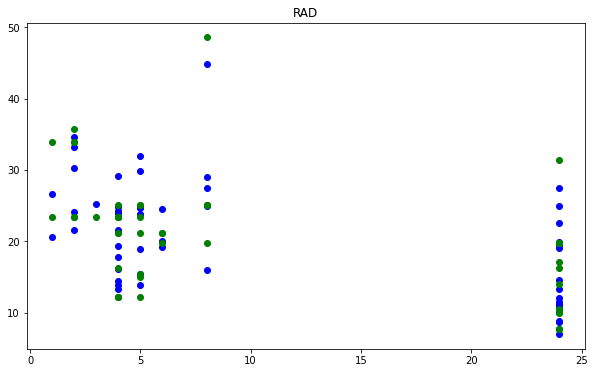

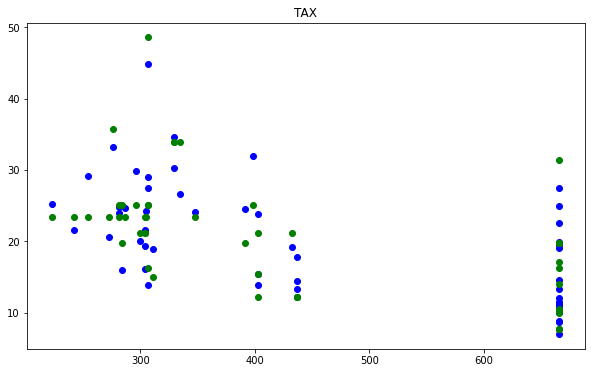

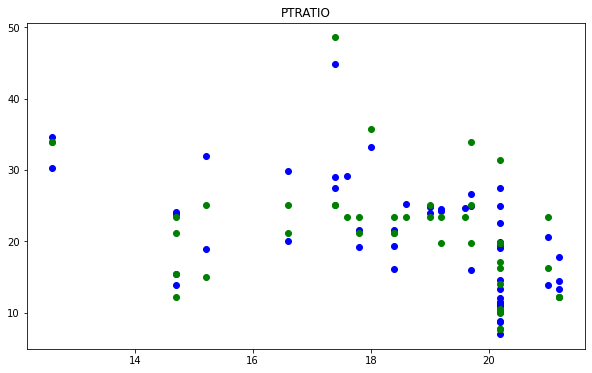

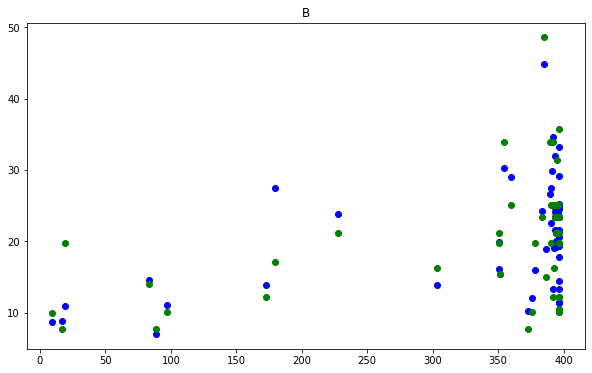

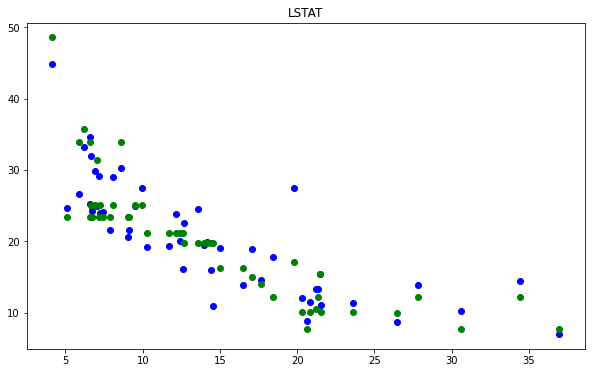

In [171]:
xy_e = pd.DataFrame(x_test, columns = boston["feature_names"])
xy_e["預測"] = x_t
xy_e["真實"] = y_t
xy_e["平方誤差"] = ((x_t-y_t)**2)/x_t.size
xy_e["真實資料平均值"] = mu

MAP = xy_e.sort_values(by = ["預測"], ignore_index = True)


plt.figure(figsize = (10, 6))
plt.plot(MAP["真實"], color = "green")
plt.plot(MAP["預測"],"b^")
plt.plot(MAP["平方誤差"])
plt.plot(MAP["真實資料平均值"])

# CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT 

for i in boston["feature_names"]:
  plt.figure(num = i, figsize = (10, 6))
  plt.title(i, loc='center')
  plt.plot(MAP[i], MAP["真實"],"bo")
  plt.plot(MAP[i], MAP["預測"],"go")

In [148]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.7886775195464347

統計資料量需求：\
**ML**：一千以上\
**DL**：一萬以上

**資料量多寡 -> 問題難度** 欄位數目掛勾